<a href="https://colab.research.google.com/github/AbdKhuffash/Udacity_P3_Communicate-Data-Findings/blob/main/Part_II_Explanatory_FordGoBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II -  Ford GoBike System Data Analysis
## by Abd Khuffash

## Investigation Overview


* The purpose of this presentation is to analyze the usage patterns of the Ford GoBike system, focusing on trip duration, user types, and ride times. Through visualizations, we will uncover key insights into how subscribers and customers engage with the bike-sharing service throughout different times of the day and week.

* Peak Usage Times: The majority of bike rides take place during the morning and evening commute hours (around 8 AM and 5-6 PM).

* User Type Differences: Subscribers typically take shorter, more frequent rides, suggesting they use the service mainly for commuting. In contrast, customers have longer rides, particularly on weekends, likely for leisure purposes.

* Day of Week Patterns: Subscribers are more active during the weekdays, with a peak on Fridays, while customers tend to ride more on weekends.










## Dataset Overview and Executive Summary
The Ford GoBike dataset provides detailed information on individual bike rides within a bike-sharing system in the San Francisco Bay Area. It includes various attributes such as trip duration, station locations, user demographics, and time-related details. Below are the key columns from the dataset:

- duration_sec: Total duration of the trip in seconds.
- start_time: Timestamp indicating when the ride started.
- end_time: Timestamp indicating when the ride ended.
- start_station_id: Identifier for the starting station.
- start_station_name: Name of the starting station.
- start_station_latitude: Latitude of the starting station.
- start_station_longitude: Longitude of the starting station.
- end_station_id: Identifier for the ending station.
- end_station_name: Name of the ending station.
- end_station_latitude: Latitude of the ending station.
- end_station_longitude: Longitude of the ending station.
- bike_id: Unique identifier for each bike.
- user_type: Categorizes users as either a 'Subscriber' or 'Customer'.
- member_birth_year: Birth year of the rider.
- member_gender: Gender of the rider (Male, Female, or Other).
- bike_share_for_all_trip: Indicates whether the bike was shared for all trips.
- day_of_week: Day of the week when the trip was taken.
- duration_min: Trip duration converted into minutes for easier analysis.
- member_age: Calculated age of the rider based on their birth year.
- distance_km: Estimated distance between start and end stations, calculated using their geographic coordinates.

The dataset consists of 20 columns and contains 183,215 individual bike rides, each with details such as trip duration, start and end locations, user type, and demographics.




import all packages and set plots to be embedded inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [3]:
fordgobike_clean = pd.read_csv('fordgobike_clean.csv')

In [4]:
fordgobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,day_of_week,duration_min,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No,41.0,Thursday,869.750000,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535.0,Customer,NaN,Unknown,No,NaN,Thursday,708.683333,1.742999
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No,53.0,Thursday,1030.900000,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No,36.0,Thursday,608.166667,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes,51.0,Thursday,26.416667,2.409301


In [6]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146569 entries, 0 to 146568
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             146569 non-null  int64  
 1   start_time               146569 non-null  object 
 2   end_time                 146569 non-null  object 
 3   start_station_id         146569 non-null  float64
 4   start_station_name       146569 non-null  object 
 5   start_station_latitude   146569 non-null  float64
 6   start_station_longitude  146569 non-null  float64
 7   end_station_id           146569 non-null  float64
 8   end_station_name         146569 non-null  object 
 9   end_station_latitude     146569 non-null  float64
 10  end_station_longitude    146569 non-null  float64
 11  bike_id                  146568 non-null  float64
 12  user_type                146568 non-null  object 
 13  member_birth_year        139990 non-null  float64
 14  memb

## Percentage of Genders

The bar chart displays the percentage distribution of the most common genders in the dataset.








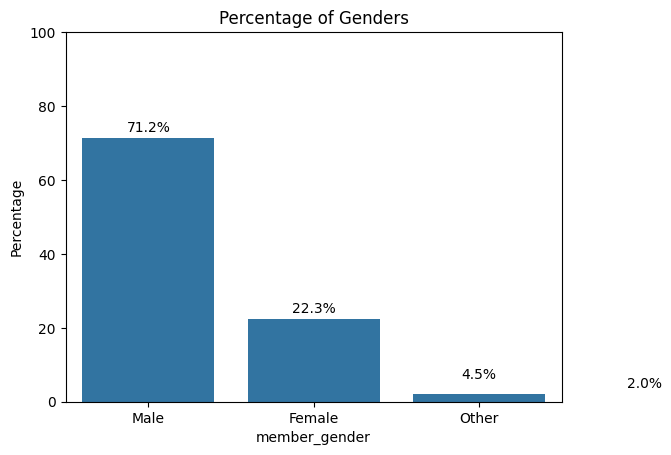

In [11]:
perc_of_gend = fordgobike_clean["member_gender"].value_counts(normalize=True) * 100

# create a bar plot
pg = sns.barplot(x=perc_of_gend.index, y=perc_of_gend.values, order=["Male", "Female", "Other"], color="tab:blue",)

# set plot title and y-axis label
plt.title("Percentage of Genders")
plt.ylabel("Percentage")
plt.ylim(0, 100)

# add text annotations for each bar indicating the percentage value
for i, v in enumerate(perc_of_gend.values):
    pg.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom")

# show the plot
plt.show()

##Popular Start Stations

This visualization highlights the most popular start stations, showing where the majority of trips begin. This analysis helps pinpoint high-traffic areas for the bike-sharing service.


top 10 most popular start stations

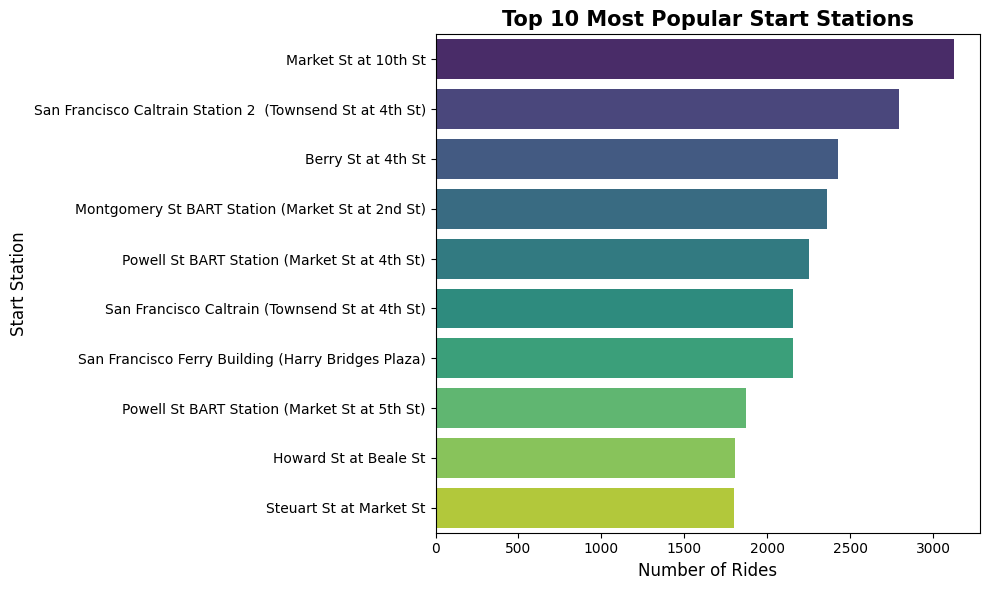

In [8]:

plt.figure(figsize=(10, 6))
top_start_stations = fordgobike_clean['start_station_name'].value_counts().head(10)
sns.barplot(y=top_start_stations.index, x=top_start_stations.values, palette='viridis')

plt.title('Top 10 Most Popular Start Stations', fontsize=15, fontweight='bold')
plt.xlabel('Number of Rides', fontsize=12)
plt.ylabel('Start Station', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



##Rides by Hour for Subscribers vs. Customers

This visualization illustrates the distribution of rides by hour for both subscribers and customers, aiming to reveal the time preferences of each user type.








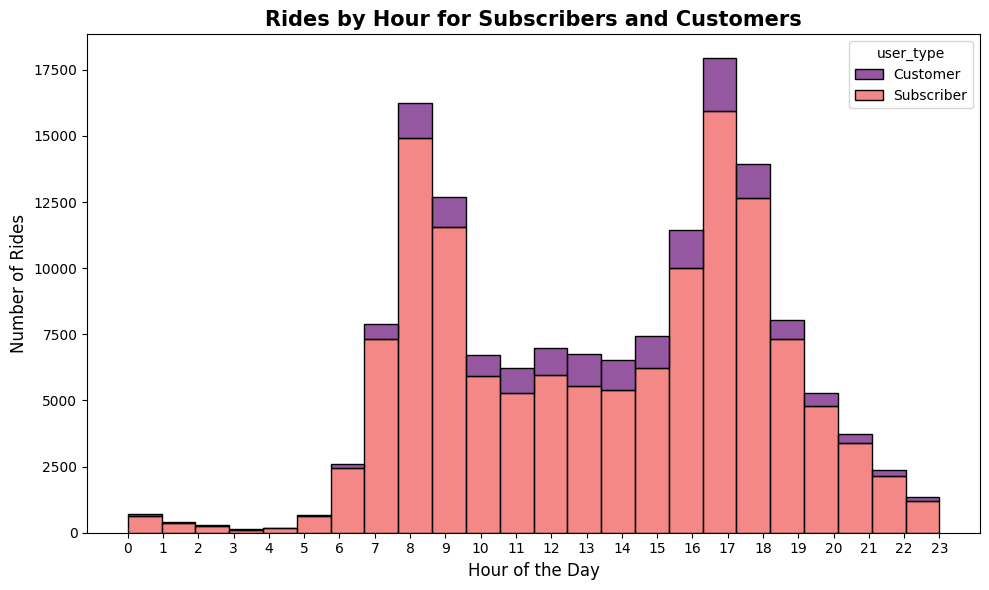

In [9]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['start_hour'] = fordgobike_clean['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(data=fordgobike_clean, x='start_hour', hue='user_type', bins=24, kde=False, stat='count',
             multiple='stack', palette='magma')

plt.title('Rides by Hour for Subscribers and Customers', fontsize=15, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(ticks=np.arange(0, 24, 1), labels=np.arange(0, 24, 1), fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


##Rides by Day of the Week

This visualization analyzes bike usage throughout the week, providing insights into the weekly patterns of bike usage.








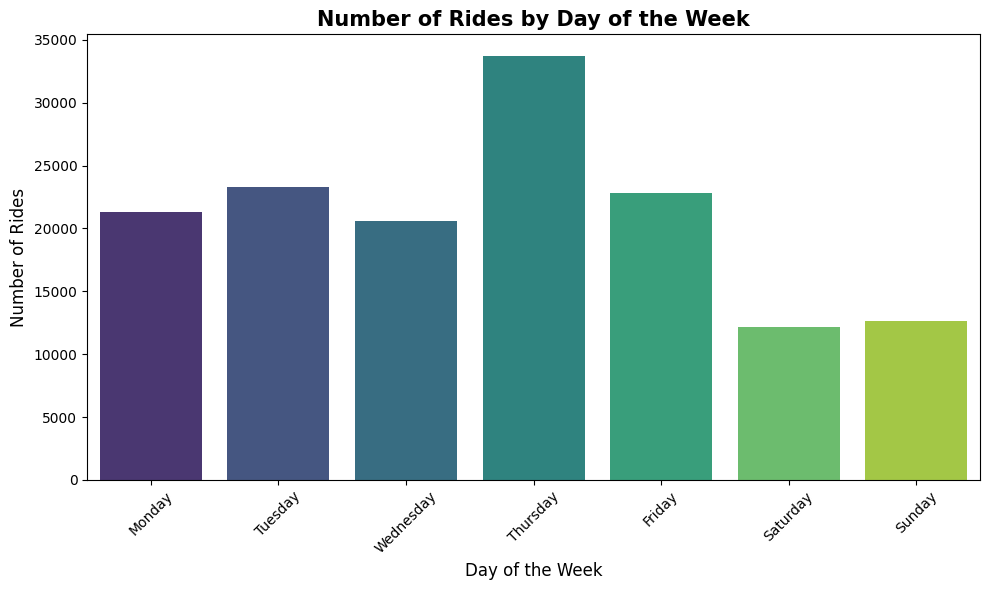

In [10]:
fordgobike_clean['start_time'] = pd.to_datetime(fordgobike_clean['start_time'])
fordgobike_clean['day_of_week'] = fordgobike_clean['start_time'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=fordgobike_clean, x='day_of_week', palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Number of Rides by Day of the Week', fontsize=15, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()